In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

In [3]:
plt.style.use( 'seaborn-v0_8-darkgrid')

In [4]:
df=pd.read_csv('spam.csv',encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [5]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

# Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
1367,ham,"I don't know, same thing that's wrong everyso ..."
4144,ham,Lol I would but despite these cramps I like be...
5567,spam,This is the 2nd time we have tried 2 contact u...
3129,ham,Ok. But i finish at 6.
4858,ham,"Hey, a guy I know is breathing down my neck to..."


In [9]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [10]:
df.sample(5)

,target,text
4717,ham,My uncles in Atlanta. Wish you guys a great se...
4649,ham,Finally it has happened..! Aftr decades..! BEE...
1497,ham,I'm putting it on now. It should be ready for ...
3052,ham,Pls send me the correct name da.
3814,ham,"Not yet chikku..k, then wat abt tht guy did he..."


In [11]:
from sklearn.preprocessing import LabelEncoder

encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [12]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [13]:
df.duplicated().sum()

403

In [14]:
df=df.drop_duplicates(keep='first')
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [15]:
df.duplicated().sum()

0

# EDA

In [16]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

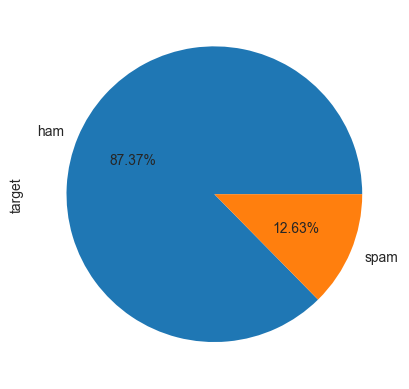

In [17]:
df['target'].value_counts().plot(kind='pie',labels=['ham','spam'],autopct="%.2f%%")
plt.show()

In [18]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Soham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [19]:
#Number of characters
df['num_chars']=df['text'].apply(len)
df

,target,text,num_chars
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61
...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161
5568,0,Will Ì_ b going to esplanade fr home?,37
5569,0,"Pity, * was in mood for that. So...any other s...",57
5570,0,The guy did some bitching but I acted like i'd...,125


In [20]:
#Number of words
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_chars,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
df['num_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_chars,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [22]:
df[['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
# ham messages
df[df['target']==0][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
# spam messages
df[df['target']==1][['num_chars','num_words','num_sentences']].describe()

,num_chars,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


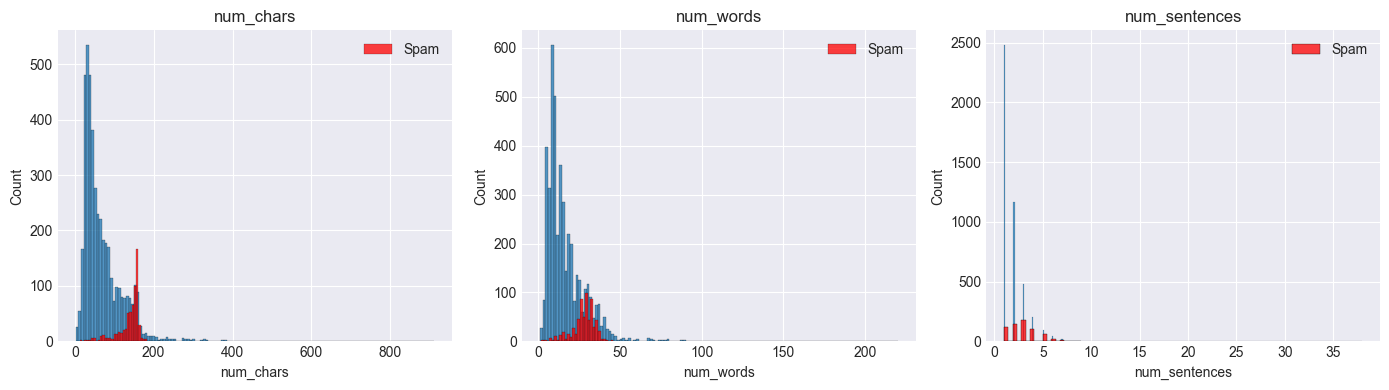

In [25]:
plt.figure(figsize=(14,4))

plt.subplot(1,3,1)
sns.histplot(df[df['target']==0]['num_chars'])
sns.histplot(df[df['target']==1]['num_chars'],color='red',label='Spam')
plt.title("num_chars")
plt.legend()

plt.subplot(1,3,2)
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red',label='Spam')
plt.title("num_words")
plt.legend()

plt.subplot(1,3,3)
sns.histplot(df[df['target']==0]['num_sentences'])
sns.histplot(df[df['target']==1]['num_sentences'],color='red',label='Spam')
plt.title("num_sentences")
plt.legend()

plt.tight_layout()
plt.show()

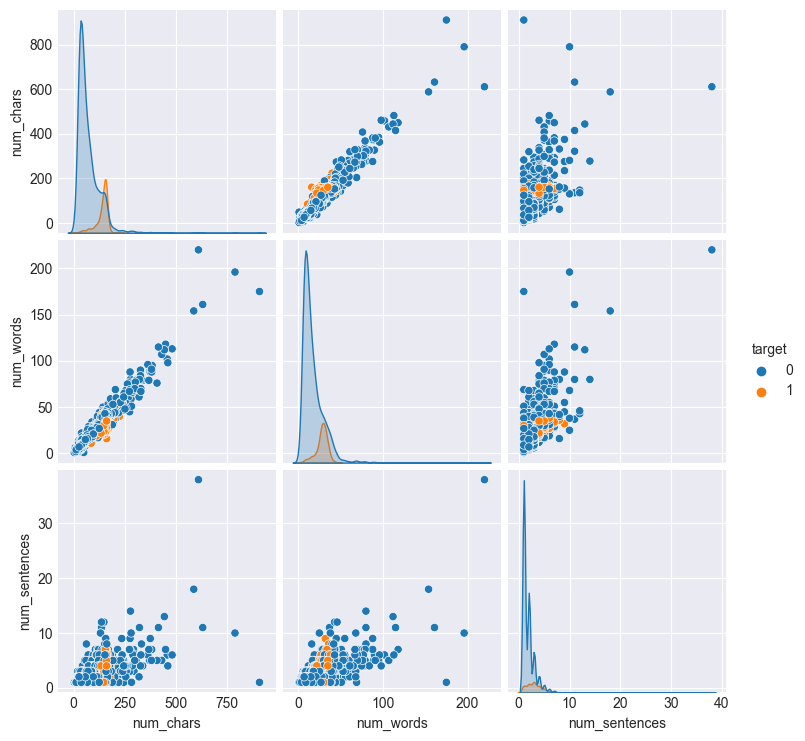

In [26]:
sns.pairplot(df,hue='target');

In [27]:
df.corr()

,target,num_chars,num_words,num_sentences
target,1.000000,0.384717,0.262912,0.263939
num_chars,0.384717,1.000000,0.965760,0.624139
num_words,0.262912,0.965760,1.000000,0.679971
num_sentences,0.263939,0.624139,0.679971,1.000000


<AxesSubplot: >

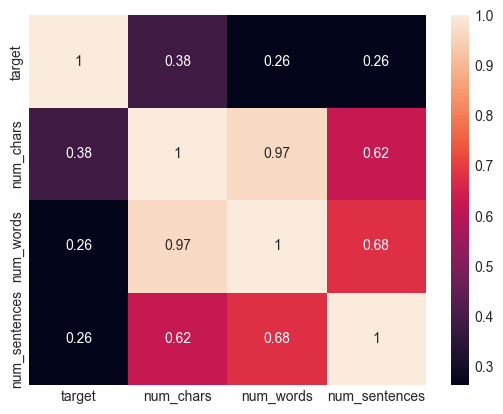

In [28]:
sns.heatmap(df.corr(),annot=True)

# Data Preprocessing

In [29]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

puncs=string.punctuation
stop_words=stopwords.words('english')
stemmer=PorterStemmer()

In [30]:
puncs

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [32]:
def transform_text(text):
    
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    y=[]
    
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text: 
        if i not in puncs and i not in stop_words:
            y.append(i)
            
    text=y[:]
    y.clear()
    
    for i in text:
        y.append(stemmer.stem(i))
            
    return ' '.join(y)

In [33]:
transform_text("Did you like my presentation on Machine Learning?")

'like present machin learn'

In [34]:
transform_text(df['text'][0])

'go jurong point crazi avail bugi n great world la e buffet cine got amor wat'

In [35]:
df['transformed_text']=df['text'].apply(transform_text)
df.sample(5)

,target,text,num_chars,num_words,num_sentences,transformed_text
3744,0,"Aight, let me know when you're gonna be around...",50,13,1,aight let know gon na around usf
5547,1,Had your contract mobile 11 Mnths? Latest Moto...,160,35,5,contract mobil 11 mnth latest motorola nokia e...
3118,0,Stop knowing me so well!,24,6,1,stop know well
761,0,"We are at grandmas. Oh dear, u still ill? I fe...",135,34,5,grandma oh dear u still ill felt shit morn thi...
3271,0,"MOON has come to color your dreams, STARS to m...",121,26,2,moon come color dream star make music sm give ...


In [36]:
from wordcloud import WordCloud

wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))

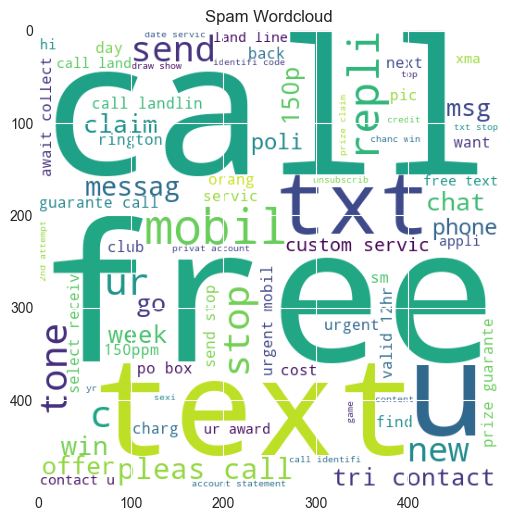

In [37]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title('Spam Wordcloud')
plt.show()

In [38]:
ham_wc=wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=' '))

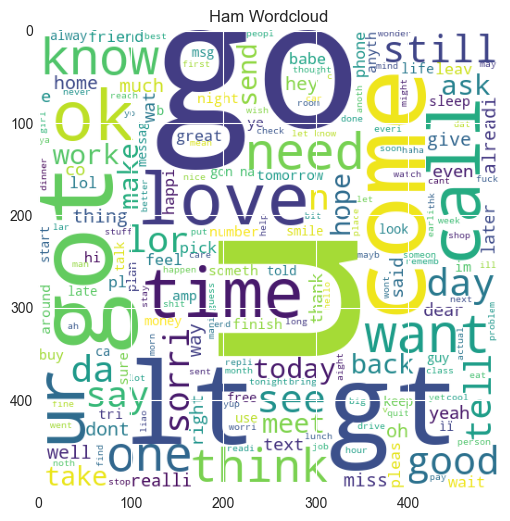

In [39]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)
plt.title("Ham Wordcloud")
plt.show()

In [40]:
# 30 most common words in spam messages
spam_corpus=[]

for msg in df[df['target']==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [41]:
from collections import Counter

Counter(spam_corpus).most_common(30)

[('call', 320),
 ('free', 191),
 ('2', 155),
 ('txt', 141),
 ('text', 122),
 ('u', 119),
 ('ur', 119),
 ('mobil', 114),
 ('stop', 104),
 ('repli', 103),
 ('claim', 98),
 ('4', 97),
 ('prize', 82),
 ('get', 74),
 ('new', 64),
 ('servic', 64),
 ('tone', 63),
 ('send', 60),
 ('urgent', 57),
 ('nokia', 57),
 ('contact', 56),
 ('award', 55),
 ('phone', 52),
 ('cash', 51),
 ('pleas', 51),
 ('week', 49),
 ('win', 48),
 ('c', 45),
 ('collect', 45),
 ('min', 45)]

In [42]:
most_common_30_words_spam_df=pd.DataFrame(Counter(spam_corpus).most_common(30))
most_common_30_words_spam_df.rename(columns={0:'words',1:'frequency'},inplace=True)

In [43]:
most_common_30_words_spam_df

,words,frequency
0,call,320
1,free,191
2,2,155
3,txt,141
4,text,122
5,u,119
6,ur,119
7,mobil,114
8,stop,104
9,repli,103


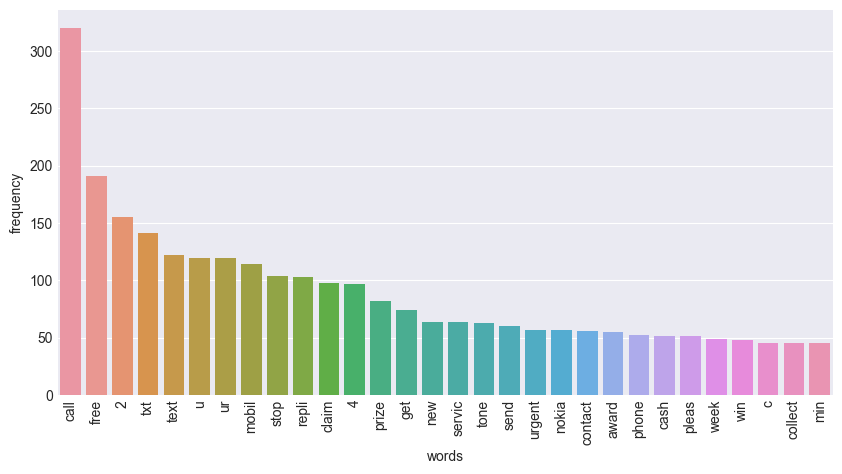

In [44]:
plt.figure(figsize=(10,5))
sns.barplot(x='words',y='frequency',data=most_common_30_words_spam_df)
plt.xticks(rotation='vertical')
plt.show()

In [45]:
# 30 most common words in ham messages
ham_corpus=[]

for msg in df[df['target']==0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)
        
most_common_30_words_ham_df=pd.DataFrame(Counter(ham_corpus).most_common(30))
most_common_30_words_ham_df.rename(columns={0:'words',1:'frequency'},inplace=True)
most_common_30_words_ham_df

,words,frequency
0,u,883
1,go,404
2,get,349
3,gt,288
4,lt,287
5,2,284
6,come,275
7,got,236
8,know,236
9,like,234


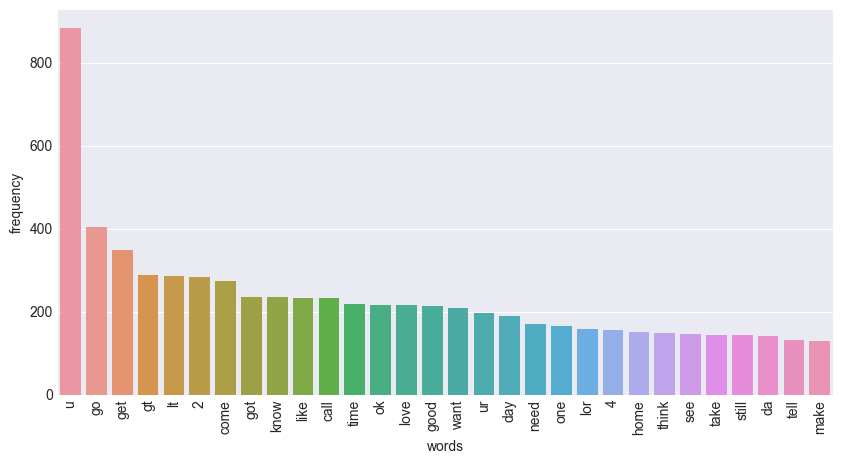

In [46]:
plt.figure(figsize=(10,5))
sns.barplot(x='words',y='frequency',data=most_common_30_words_ham_df)
plt.xticks(rotation='vertical')
plt.show()

# Building the Model

In [47]:
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
X=cv.fit_transform(df['transformed_text']).toarray()

X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [48]:
X.shape

(5169, 6708)

In [49]:
y=df['target'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [50]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape

((4135, 6708), (1034, 6708))

In [51]:
from sklearn.naive_bayes import *
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score,recall_score,f1_score

gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [52]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.98      0.88      0.93       896
           1       0.53      0.86      0.66       138

    accuracy                           0.88      1034
   macro avg       0.75      0.87      0.79      1034
weighted avg       0.92      0.88      0.89      1034

[[792 104]
 [ 20 118]]


In [53]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_mnb))
print(confusion_matrix(y_test,y_pred=y_pred_mnb))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       896
           1       0.83      0.91      0.87       138

    accuracy                           0.96      1034
   macro avg       0.91      0.94      0.93      1034
weighted avg       0.97      0.96      0.96      1034

[[871  25]
 [ 12 126]]


In [54]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_bnb))
print(confusion_matrix(y_test,y_pred=y_pred_bnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[893   3]
 [ 28 110]]


In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [121]:
tfidf=TfidfVectorizer()
X=tfidf.fit_transform(df['transformed_text']).toarray()

X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [122]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
X_train.shape,X_test.shape

((4135, 6708), (1034, 6708))

In [123]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [124]:
gnb.fit(X_train,y_train)
y_pred_gnb=gnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       896
           1       0.52      0.82      0.64       138

    accuracy                           0.88      1034
   macro avg       0.75      0.85      0.78      1034
weighted avg       0.91      0.88      0.89      1034

[[793 103]
 [ 25 113]]


In [125]:
mnb.fit(X_train,y_train)
y_pred_mnb=mnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_mnb))
print(confusion_matrix(y_test,y_pred=y_pred_mnb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034

[[896   0]
 [ 42  96]]


In [126]:
bnb.fit(X_train,y_train)
y_pred_bnb=bnb.predict(X_test)

print(classification_report(y_test,y_pred=y_pred_bnb))
print(confusion_matrix(y_test,y_pred=y_pred_bnb))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       0.97      0.80      0.88       138

    accuracy                           0.97      1034
   macro avg       0.97      0.90      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[893   3]
 [ 28 110]]


In [62]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [63]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [64]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [65]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    
    clf.fit(X_train,y_train)
    
    y_pred = clf.predict(X_test)
    
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [66]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9729206963249516, 0.9741379310344828)

In [67]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9729206963249516
Precision -  0.9741379310344828
For  KN
Accuracy -  0.9003868471953579
Precision -  1.0
For  NB
Accuracy -  0.9593810444874274
Precision -  1.0
For  DT
Accuracy -  0.9381044487427466
Precision -  0.8627450980392157
For  LR
Accuracy -  0.9516441005802708
Precision -  0.94
For  RF
Accuracy -  0.971953578336557
Precision -  1.0
For  AdaBoost
Accuracy -  0.9613152804642167
Precision -  0.9454545454545454
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8625954198473282
For  ETC
Accuracy -  0.9729206963249516
Precision -  0.9824561403508771
For  GBDT
Accuracy -  0.9526112185686654
Precision -  0.9238095238095239
For  xgb
Accuracy -  0.9700193423597679
Precision -  0.9349593495934959


In [68]:
performance_df=pd.DataFrame({'Model':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values(by='Precision',ascending=False)
performance_df

,Model,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
4,LR,0.951644,0.940000
10,xgb,0.970019,0.934959
9,GBDT,0.952611,0.923810
3,DT,0.938104,0.862745


In [69]:
print(confusion_matrix(y_test,rfc.predict(X_test)))

[[896   0]
 [ 29 109]]


In [70]:
performance_df1 = pd.melt(performance_df, id_vars = "Model")
performance_df1

,Model,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,LR,Accuracy,0.951644
7,xgb,Accuracy,0.970019
8,GBDT,Accuracy,0.952611
9,DT,Accuracy,0.938104


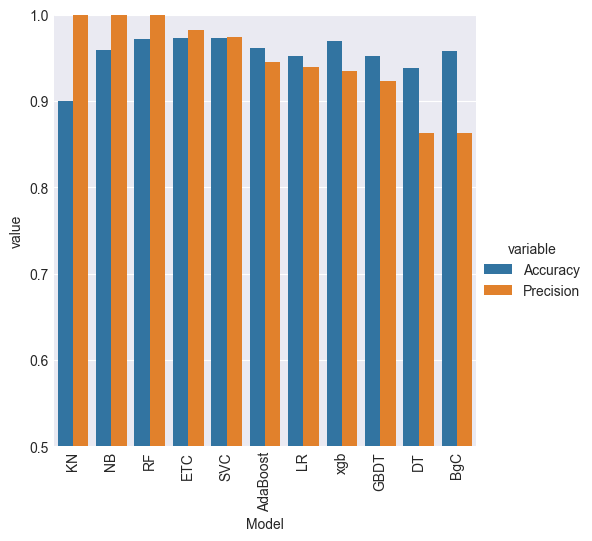

In [71]:
sns.catplot(x = 'Model', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [72]:
# Voting classifier
from sklearn.ensemble import VotingClassifier

rfc = RandomForestClassifier(n_estimators=50, random_state=2)
nb=MultinomialNB()
etc=ExtraTreesClassifier(n_estimators=50,random_state=2)

voting=VotingClassifier(estimators=[('rfc',rfc),('nb',nb),('extratrees',etc)],voting='soft')
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('rfc',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('nb', MultinomialNB()),
                             ('extratrees',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [73]:
y_pred_voting=voting.predict(X_test)

print(classification_report(y_test,y_pred_voting))
print(confusion_matrix(y_test,y_pred_voting))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.79      0.88       138

    accuracy                           0.97      1034
   macro avg       0.98      0.89      0.93      1034
weighted avg       0.97      0.97      0.97      1034

[[896   0]
 [ 29 109]]


In [75]:
df.head()

,target,text,num_chars,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [77]:
X_new=df['transformed_text'].values
y_new=df['target']

In [78]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y_new,test_size=0.2,random_state=2)

In [80]:
X_train_new.shape

(4135,)

In [82]:
y_train_new.shape

(4135,)

In [114]:
from sklearn.pipeline import Pipeline

tfidf_3000_words=TfidfVectorizer(max_features=3000)

pipeline=Pipeline([
    ('tfidf',tfidf_3000_words),
    ('clf',MultinomialNB())
])

pipeline.fit(X_train_new,y_train_new)

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('clf', MultinomialNB())])

In [115]:
y_pred_pipeline=pipeline.predict(X_test_new)
print(classification_report(y_test_new,y_pred_pipeline))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       896
           1       1.00      0.77      0.87       138

    accuracy                           0.97      1034
   macro avg       0.98      0.88      0.93      1034
weighted avg       0.97      0.97      0.97      1034



In [116]:
accuracy_score(y_test_new,y_pred_pipeline)

0.9690522243713733

In [117]:
confusion_matrix(y_test_new,y_pred_pipeline)

array([[896,   0],
       [ 32, 106]], dtype=int64)

In [118]:
confusion_matrix(y_test,y_pred_mnb)

array([[896,   0],
       [ 42,  96]], dtype=int64)

In [135]:
class_names=['Not Spam','spam']

In [145]:
def predict_pipeline():
    
    text=input('Enter the message: ')
    text=transform_text(text)
    text=np.expand_dims(text,axis=0)
    
    pred_probs=pipeline.predict_proba(text)
    pred=pipeline.predict(text)[0]
    prob=np.max(pred_probs)
    
    pred_class=class_names[pred]
    
    print('-'*127)
    
    print(f"Prediction: {pred_class}\nProb: {prob}")

In [155]:
predict_pipeline()

Enter the message: 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'
-------------------------------------------------------------------------------------------------------------------------------
Prediction: spam
Prob: 0.9655980486636974


In [156]:
def predict(model):
    
    text=input("Enter the message: ")
    text=transform_text(text)
    
    pred=model.predict(tfidf.transform(np.expand_dims(text,axis=0)).toarray())[0]
    pred_probs=model.predict_proba(tfidf.transform(np.expand_dims(text,axis=0)).toarray())
    
    pred_class=class_names[pred]
    
    prob=np.max(pred_probs)
    
    print('-'*127)
    
    print(f"Prediction: {pred_class}\nProb: {prob}")

In [157]:
predict(model=mnb)

Enter the message: 'SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info'
-------------------------------------------------------------------------------------------------------------------------------
Prediction: spam
Prob: 0.9159797457631316


In [158]:
print(classification_report(y_test,y_pred_mnb))

              precision    recall  f1-score   support

           0       0.96      1.00      0.98       896
           1       1.00      0.70      0.82       138

    accuracy                           0.96      1034
   macro avg       0.98      0.85      0.90      1034
weighted avg       0.96      0.96      0.96      1034



In [159]:
pipeline

Pipeline(steps=[('tfidf', TfidfVectorizer(max_features=3000)),
                ('clf', MultinomialNB())])

In [160]:
import pickle

pickle.dump(tfidf_3000_words,open('vectorizer.pkl','wb'))
pickle.dump(pipeline,open('model.pkl','wb'))

In [162]:
pickle.dump(transform_text,open('transform_text.pkl','wb'))

In [164]:
df.to_csv('spam_preprocessed.csv')